In [5]:
!pip install pandas pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport

#from a previous lab
#Populate Data Frame
df = pd.read_csv("red_wine.csv")

# Create a profile report
profile = ProfileReport(df)

# Output HTML report file
profile.to_file("red-wine-report.html")



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score

# Load
df = pd.read_csv("red_wine.csv")

# Preprocess the 'type' column with label encoding
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Define features and target
#features
X = df[['citric acid', 'sulphates', 'alcohol']]
#target
y = df['type']

# Models to evaluate - to be iterated through a for loop
models = {
    #OneR dummy classifier from scikit used here
    'Baseline (Dummy)':  DummyClassifier(strategy="most_frequent"),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM Linear': SVC(kernel='linear'),
    'SVM RBF': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

# Perform 10-fold cross-validation for each (god i love for loops)
results = {}
for model_name, model in models.items():
    if model is None:
        print("Error Fetching Model From Dictionary")
    else:
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        auc_scores = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(roc_auc_score))
    
    results[model_name] = {
        'Accuracy': accuracy_scores,
        'AUC': auc_scores
    }

# Display the performance metrics
for model_name, metrics in results.items():
    print(f"{model_name}:")
    auc_mean = sum(metrics['AUC']) / 10
    accuracy_mean = sum(metrics['Accuracy']) / 10
    print(f"  Mean Accuracy: {accuracy_mean}")
    print(f"  Mean AUC: {auc_mean}")


Baseline (Dummy):
  Mean Accuracy: 0.5290683605565637
  Mean AUC: 0.5
Logistic Regression:
  Mean Accuracy: 0.7881125226860254
  Mean AUC: 0.7888253370610229
Naive Bayes:
  Mean Accuracy: 0.8196612220205687
  Mean AUC: 0.8238765537556152
Decision Tree:
  Mean Accuracy: 0.8125529340592861
  Mean AUC: 0.8257244491590257
SVM Linear:
  Mean Accuracy: 0.7933756805807622
  Mean AUC: 0.7970554752766421
SVM RBF:
  Mean Accuracy: 0.5413490623109497
  Mean AUC: 0.5175250626566416
Random Forest:
  Mean Accuracy: 0.8476406533575318
  Mean AUC: 0.8443481533237109


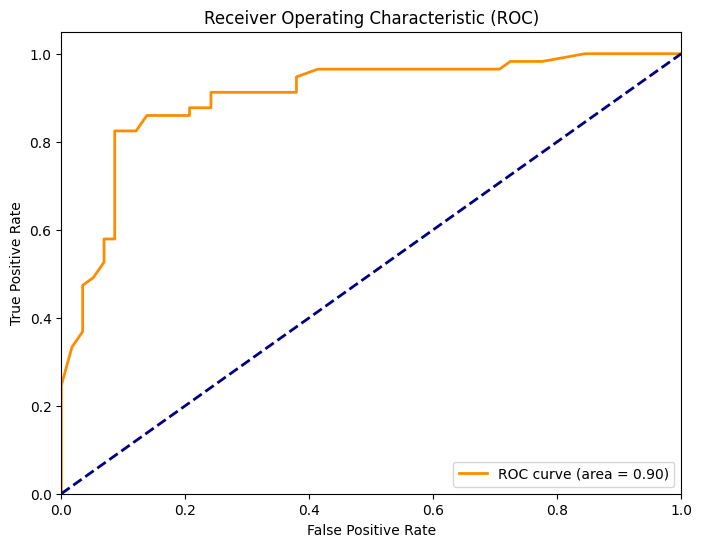

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

#copied from above
# Load
df = pd.read_csv("red_wine.csv")

# Preprocess the 'type' column with label encoding
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Define features and target
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Not sure if I do this here or run it through again - Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Set Matplotlib backend to inline mode - fix from previous lab
%matplotlib inline

# Plot the ROC curve - copied from lab
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load
white_wine_df = pd.read_csv("white_wine.csv")

# Preprocess the 'type' column with label encoding (similar to the 'red-wine.csv' dataset)
le = LabelEncoder()
white_wine_df['type'] = le.fit_transform(white_wine_df['type'])

# Define features and target
#features
X_white_wine = white_wine_df[['citric acid', 'sulphates', 'alcohol']]
#target
y_white_wine = white_wine_df['type']

# Use the trained Random Forest Classifier from above problem to make predictions
y_probs_white_wine = rf_classifier.predict_proba(X_white_wine)[:, 1]

# Calculate AUC score for the white wine
auc_score_white_wine = roc_auc_score(y_white_wine, y_probs_white_wine)

print("AUC Score for white_wine.csv:", auc_score_white_wine)


AUC Score for white_wine.csv: 0.9204435872709739
